In [ ]:
# !pip install pandas numpy matplotlib seaborn scikit-learn factor-analyzer scipy


# Main code which uses ALL Questions

/home/manu/anaconda3/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


KMO Test Score: 0.873
Bartlett’s Test p-value: 0.000


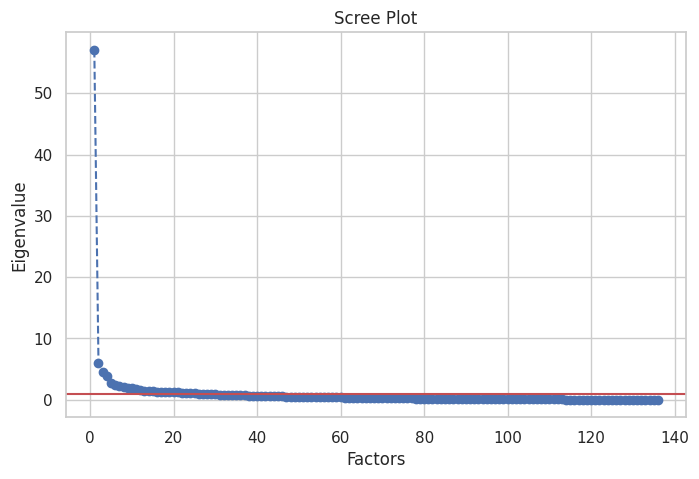

Optimal number of factors: 26


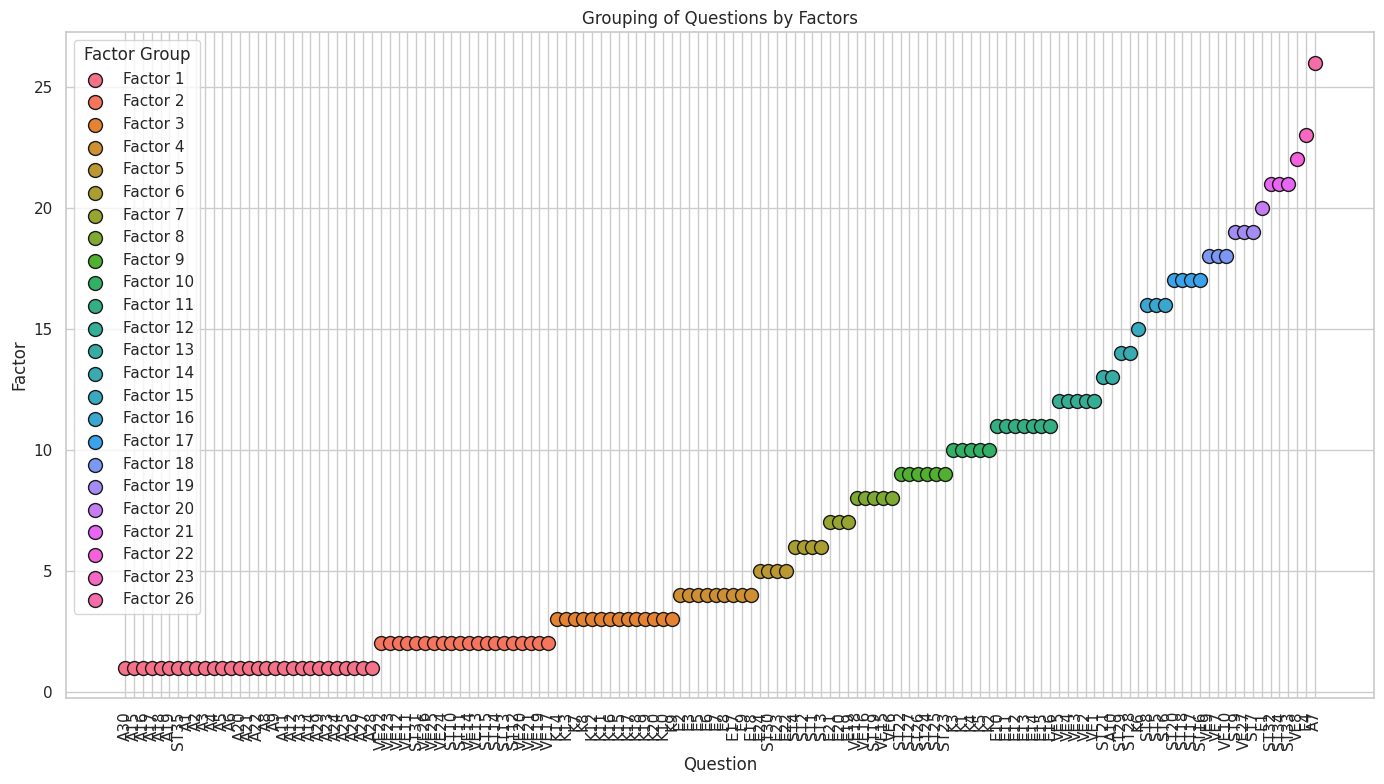

    Question  Group
0        A30      1
1        A15      1
2        A16      1
3        A17      1
4        A18      1
..       ...    ...
131     ST34     21
132     ST33     21
133      VE8     22
134       E4     23
135       A7     26

[136 rows x 2 columns]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import bartlett

# Load the data from CSV
file_name = 'Phase 1 Data.csv'
data = pd.read_csv(file_name)

# Select only the question columns (excluding demographics)
questions_columns = [col for col in data.columns if col.startswith(('K', 'VE', 'ST', 'E', 'A'))]
questions_data = data[questions_columns]

# Handle missing values
questions_data.fillna(questions_data.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
questions_data_scaled = scaler.fit_transform(questions_data)

# Regularization for factor analysis
def regularize(data):
    epsilon = 1e-8
    return data + epsilon

questions_data_scaled_reg = regularize(questions_data_scaled)

# Perform KMO and Bartlett’s Test
try:
    kmo_all, kmo_model = calculate_kmo(questions_data_scaled_reg)
    print(f"KMO Test Score: {kmo_model:.3f}")
except Exception as e:
    print(f"Error in KMO calculation: {e}")

try:
    chi_square_value, p_value = bartlett(*[questions_data[col] for col in questions_columns])
    print(f"Bartlett’s Test p-value: {p_value:.3f}")
except Exception as e:
    print(f"Error in Bartlett’s Test calculation: {e}")

# Perform Factor Analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(questions_data_scaled_reg)

# Get eigenvalues to determine the optimal number of factors
eigenvalues, _ = fa.get_eigenvalues()

# Plot a Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

# Determine the number of factors with eigenvalue > 1
optimal_factors = sum(eigenvalues > 1)
print(f'Optimal number of factors: {optimal_factors}')

# Perform Factor Analysis with the optimal number of factors
fa_optimal = FactorAnalyzer(n_factors=optimal_factors, rotation='promax')
fa_optimal.fit(questions_data_scaled_reg)

# Get Factor Loadings
factor_loadings = pd.DataFrame(fa_optimal.loadings_, index=questions_columns)

# Save factor loadings to CSV
factor_loadings.to_csv('factor_loadings.csv')

# Create a DataFrame for factor loadings with corresponding factor names
factor_loadings_df = factor_loadings.copy()
factor_loadings_df['Factor'] = np.argmax(fa_optimal.loadings_, axis=1) + 1  # Adding 1 to start factors from 1

# Create a DataFrame for grouped questions
grouped_questions_df = factor_loadings_df.reset_index()
grouped_questions_df.columns = ['Question'] + [f'Factor_{i+1}' for i in range(optimal_factors)] + ['Factor']
grouped_questions_df = grouped_questions_df[['Question', 'Factor']]

# Sort the DataFrame by 'Factor' column
grouped_questions_df.sort_values(by='Factor', inplace=True)

# Reset index after sorting
grouped_questions_df.reset_index(drop=True, inplace=True)

# Rename the Factor column to 'Group' for clarity
grouped_questions_df.rename(columns={'Factor': 'Group'}, inplace=True)

# Plot the factor loadings
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a color palette for the factors
palette = sns.color_palette("husl", len(grouped_questions_df['Group'].unique()))

# Plot each factor with a different color
for factor, color in zip(grouped_questions_df['Group'].unique(), palette):
    subset = grouped_questions_df[grouped_questions_df['Group'] == factor]
    plt.scatter(subset['Question'], [factor] * len(subset), label=f'Factor {factor}', s=100, edgecolor='k', color=color)

plt.xticks(rotation=90)
plt.xlabel('Question')
plt.ylabel('Factor')
plt.title('Grouping of Questions by Factors')
plt.legend(title='Factor Group')
plt.tight_layout()

# Save the plot
plt.savefig('grouped_questions_plot.png')
plt.show()

# Convert the results to a DataFrame
group_results = []
for _, row in grouped_questions_df.iterrows():
    question = row['Question']
    group_name = row['Group']
    group_results.append({'Question': question, 'Group': group_name})

group_results_df = pd.DataFrame(group_results)

# Save the grouped questions to CSV
group_results_df.to_csv('grouped_questions.csv', index=False)

# Display the grouped questions
print(group_results_df)


# K

/tmp/ipykernel_23887/1587360150.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_questions_data.fillna(k_questions_data.mean(), inplace=True)


KMO Test Score for K Questions: 0.931
Bartlett’s Test p-value for K Questions: 0.000


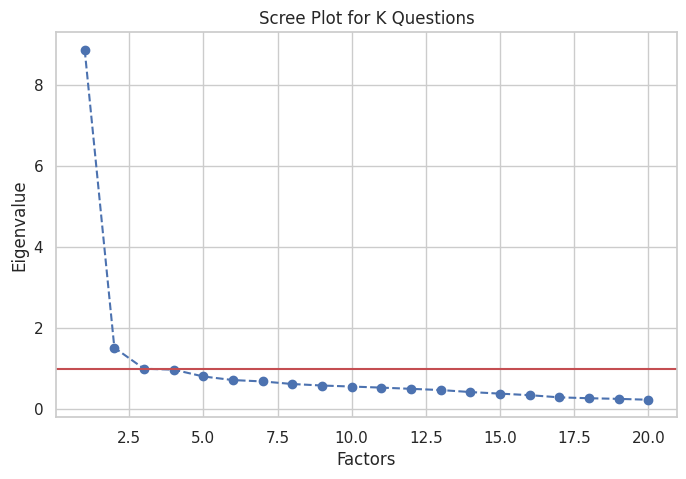

Optimal number of factors for K Questions: 2


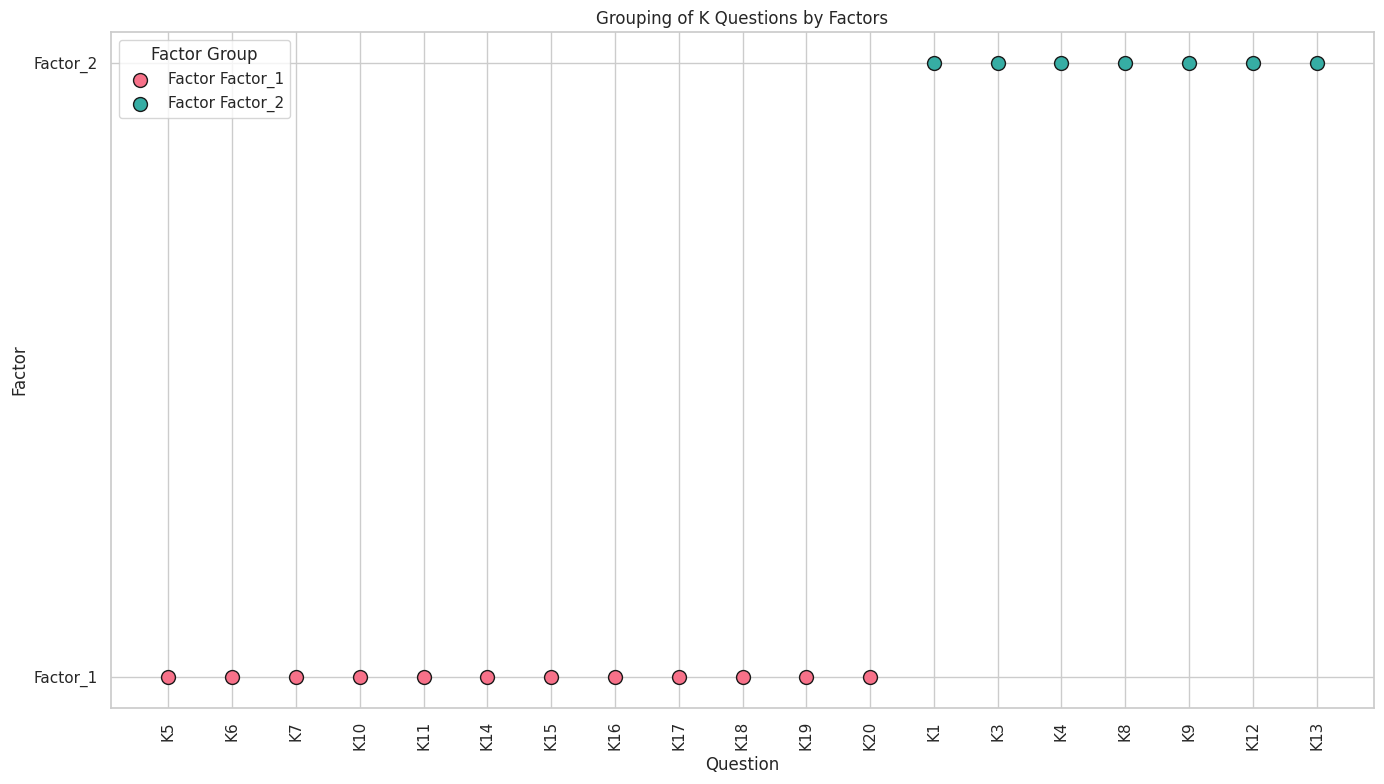

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import bartlett

# Load the data from CSV file
file_name = 'Phase 2 Data.csv'
data = pd.read_csv(file_name)

# Select only K questions
k_questions_columns = [col for col in data.columns if col.startswith('K')]
k_questions_data = data[k_questions_columns]

# Handle missing values
k_questions_data.fillna(k_questions_data.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
k_questions_data_scaled = scaler.fit_transform(k_questions_data)

# Regularization for factor analysis
def regularize(data):
    epsilon = 1e-8
    return data + epsilon

k_questions_data_scaled_reg = regularize(k_questions_data_scaled)

# Perform KMO and Bartlett’s Test
try:
    kmo_all, kmo_model = calculate_kmo(k_questions_data_scaled_reg)
    print(f"KMO Test Score for K Questions: {kmo_model:.3f}")
except Exception as e:
    print(f"Error in KMO calculation for K Questions: {e}")

try:
    chi_square_value, p_value = bartlett(*[k_questions_data[col] for col in k_questions_columns])
    print(f"Bartlett’s Test p-value for K Questions: {p_value:.3f}")
except Exception as e:
    print(f"Error in Bartlett’s Test calculation for K Questions: {e}")

# Perform Factor Analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(k_questions_data_scaled_reg)

# Get eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot for K Questions')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

# Optimal number of factors
optimal_factors = sum(eigenvalues > 1)
print(f'Optimal number of factors for K Questions: {optimal_factors}')

# Fit Factor Analysis with optimal number of factors
fa_optimal = FactorAnalyzer(n_factors=optimal_factors, rotation='promax')
fa_optimal.fit(k_questions_data_scaled_reg)

# Get Factor Loadings
factor_loadings = pd.DataFrame(fa_optimal.loadings_, index=k_questions_columns)

# Save the factor loadings to CSV
factor_loadings.to_csv('factor_loadings_K.csv')

# Automatically assign questions to factors
grouped_questions = {}
for i in range(optimal_factors):
    factor_questions = factor_loadings.index[factor_loadings[i] > 0.4].tolist()  # Adjust threshold if needed
    grouped_questions[f'Factor_{i + 1}'] = factor_questions

# Convert results to DataFrame
group_results = []
for group_name, questions in grouped_questions.items():
    for question in questions:
        group_results.append({'Question': question, 'Group': group_name})

group_results_df = pd.DataFrame(group_results)

# Save the grouped questions to CSV
group_results_df.to_csv('grouped_questions_K.csv', index=False)

# Plot the factor loadings
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a color palette for the factors
palette = sns.color_palette("husl", len(group_results_df['Group'].unique()))

# Plot each factor with a different color
for factor, color in zip(group_results_df['Group'].unique(), palette):
    subset = group_results_df[group_results_df['Group'] == factor]
    plt.scatter(subset['Question'], [factor] * len(subset), label=f'Factor {factor}', s=100, edgecolor='k', color=color)

plt.xticks(rotation=90)
plt.xlabel('Question')
plt.ylabel('Factor')
plt.title('Grouping of K Questions by Factors')
plt.legend(title='Factor Group')
plt.tight_layout()

# Save the plot
plt.savefig('grouped_questions_plot_K.png')
plt.show()


# VE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import bartlett

# Load the data from CSV file
file_name = 'Phase 2 Data.csv'
data = pd.read_csv(file_name)

# Select only VE questions
ve_questions_columns = [col for col in data.columns if col.startswith('VE')]
ve_questions_data = data[ve_questions_columns]

# Handle missing values
ve_questions_data.fillna(ve_questions_data.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
ve_questions_data_scaled = scaler.fit_transform(ve_questions_data)

# Regularization for factor analysis
def regularize(data):
    epsilon = 1e-8
    return data + epsilon

ve_questions_data_scaled_reg = regularize(ve_questions_data_scaled)

# Perform KMO and Bartlett’s Test
try:
    kmo_all, kmo_model = calculate_kmo(ve_questions_data_scaled_reg)
    print(f"KMO Test Score for VE Questions: {kmo_model:.3f}")
except Exception as e:
    print(f"Error in KMO calculation for VE Questions: {e}")

try:
    chi_square_value, p_value = bartlett(*[ve_questions_data[col] for col in ve_questions_columns])
    print(f"Bartlett’s Test p-value for VE Questions: {p_value:.3f}")
except Exception as e:
    print(f"Error in Bartlett’s Test calculation for VE Questions: {e}")

# Perform Factor Analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(ve_questions_data_scaled_reg)

# Get eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot for VE Questions')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

# Optimal number of factors
optimal_factors = sum(eigenvalues > 1)
print(f'Optimal number of factors for VE Questions: {optimal_factors}')

# Fit Factor Analysis with optimal number of factors
fa_optimal = FactorAnalyzer(n_factors=optimal_factors, rotation='promax')
fa_optimal.fit(ve_questions_data_scaled_reg)

# Get Factor Loadings
factor_loadings = pd.DataFrame(fa_optimal.loadings_, index=ve_questions_columns)

# Save the factor loadings to CSV
factor_loadings.to_csv('factor_loadings_VE.csv')

# Automatically assign questions to factors
grouped_questions = {}
for i in range(optimal_factors):
    factor_questions = factor_loadings.index[factor_loadings[i] > 0.4].tolist()  # Adjust threshold if needed
    grouped_questions[f'Factor_{i + 1}'] = factor_questions

# Convert results to DataFrame
group_results = []
for group_name, questions in grouped_questions.items():
    for question in questions:
        group_results.append({'Question': question, 'Group': group_name})

group_results_df = pd.DataFrame(group_results)

# Save the grouped questions to CSV
group_results_df.to_csv('grouped_questions_VE.csv', index=False)

# Plot the factor loadings
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a color palette for the factors
palette = sns.color_palette("husl", len(group_results_df['Group'].unique()))

# Plot each factor with a different color
for factor, color in zip(group_results_df['Group'].unique(), palette):
    subset = group_results_df[group_results_df['Group'] == factor]
    plt.scatter(subset['Question'], [factor] * len(subset), label=f'Factor {factor}', s=100, edgecolor='k', color=color)

plt.xticks(rotation=90)
plt.xlabel('Question')
plt.ylabel('Factor')
plt.title('Grouping of VE Questions by Factors')
plt.legend(title='Factor Group')
plt.tight_layout()

# Save the plot
plt.savefig('grouped_questions_plot_VE.png')
plt.show()


# ST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import bartlett

# Load the data from CSV file
file_name = 'Phase 2 Data.csv'
data = pd.read_csv(file_name)

# Select only ST questions
st_questions_columns = [col for col in data.columns if col.startswith('ST')]
st_questions_data = data[st_questions_columns]

# Handle missing values
st_questions_data.fillna(st_questions_data.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
st_questions_data_scaled = scaler.fit_transform(st_questions_data)

# Regularization for factor analysis
def regularize(data):
    epsilon = 1e-8
    return data + epsilon

st_questions_data_scaled_reg = regularize(st_questions_data_scaled)

# Perform KMO and Bartlett’s Test
try:
    kmo_all, kmo_model = calculate_kmo(st_questions_data_scaled_reg)
    print(f"KMO Test Score for ST Questions: {kmo_model:.3f}")
except Exception as e:
    print(f"Error in KMO calculation for ST Questions: {e}")

try:
    chi_square_value, p_value = bartlett(*[st_questions_data[col] for col in st_questions_columns])
    print(f"Bartlett’s Test p-value for ST Questions: {p_value:.3f}")
except Exception as e:
    print(f"Error in Bartlett’s Test calculation for ST Questions: {e}")

# Perform Factor Analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(st_questions_data_scaled_reg)

# Get eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot for ST Questions')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

# Optimal number of factors
optimal_factors = sum(eigenvalues > 1)
print(f'Optimal number of factors for ST Questions: {optimal_factors}')

# Fit Factor Analysis with optimal number of factors
fa_optimal = FactorAnalyzer(n_factors=optimal_factors, rotation='promax')
fa_optimal.fit(st_questions_data_scaled_reg)

# Get Factor Loadings
factor_loadings = pd.DataFrame(fa_optimal.loadings_, index=st_questions_columns)

# Save the factor loadings to CSV
factor_loadings.to_csv('factor_loadings_ST.csv')

# Automatically assign questions to factors
grouped_questions = {}
for i in range(optimal_factors):
    factor_questions = factor_loadings.index[factor_loadings[i] > 0.4].tolist()  # Adjust threshold if needed
    grouped_questions[f'Factor_{i + 1}'] = factor_questions

# Convert results to DataFrame
group_results = []
for group_name, questions in grouped_questions.items():
    for question in questions:
        group_results.append({'Question': question, 'Group': group_name})

group_results_df = pd.DataFrame(group_results)

# Save the grouped questions to CSV
group_results_df.to_csv('grouped_questions_ST.csv', index=False)

# Plot the factor loadings
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a color palette for the factors
palette = sns.color_palette("husl", len(group_results_df['Group'].unique()))

# Plot each factor with a different color
for factor, color in zip(group_results_df['Group'].unique(), palette):
    subset = group_results_df[group_results_df['Group'] == factor]
    plt.scatter(subset['Question'], [factor] * len(subset), label=f'Factor {factor}', s=100, edgecolor='k', color=color)

plt.xticks(rotation=90)
plt.xlabel('Question')
plt.ylabel('Factor')
plt.title('Grouping of ST Questions by Factors')
plt.legend(title='Factor Group')
plt.tight_layout()

# Save the plot
plt.savefig('grouped_questions_plot_ST.png')
plt.show()


# E

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import bartlett

# Load the data from CSV file
file_name = 'Phase 2 Data.csv'
data = pd.read_csv(file_name)

# Select only E questions
e_questions_columns = [col for col in data.columns if col.startswith('E')]
e_questions_data = data[e_questions_columns]

# Handle missing values
e_questions_data.fillna(e_questions_data.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
e_questions_data_scaled = scaler.fit_transform(e_questions_data)

# Regularization for factor analysis
def regularize(data):
    epsilon = 1e-8
    return data + epsilon

e_questions_data_scaled_reg = regularize(e_questions_data_scaled)

# Perform KMO and Bartlett’s Test
try:
    kmo_all, kmo_model = calculate_kmo(e_questions_data_scaled_reg)
    print(f"KMO Test Score for E Questions: {kmo_model:.3f}")
except Exception as e:
    print(f"Error in KMO calculation for E Questions: {e}")

try:
    chi_square_value, p_value = bartlett(*[e_questions_data[col] for col in e_questions_columns])
    print(f"Bartlett’s Test p-value for E Questions: {p_value:.3f}")
except Exception as e:
    print(f"Error in Bartlett’s Test calculation for E Questions: {e}")

# Perform Factor Analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(e_questions_data_scaled_reg)

# Get eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot for E Questions')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

# Optimal number of factors
optimal_factors = sum(eigenvalues > 1)
print(f'Optimal number of factors for E Questions: {optimal_factors}')

# Fit Factor Analysis with optimal number of factors
fa_optimal = FactorAnalyzer(n_factors=optimal_factors, rotation='promax')
fa_optimal.fit(e_questions_data_scaled_reg)

# Get Factor Loadings
factor_loadings = pd.DataFrame(fa_optimal.loadings_, index=e_questions_columns)

# Save the factor loadings to CSV
factor_loadings.to_csv('factor_loadings_E.csv')

# Automatically assign questions to factors
grouped_questions = {}
for i in range(optimal_factors):
    factor_questions = factor_loadings.index[factor_loadings[i] > 0.4].tolist()  # Adjust threshold if needed
    grouped_questions[f'Factor_{i + 1}'] = factor_questions

# Convert results to DataFrame
group_results = []
for group_name, questions in grouped_questions.items():
    for question in questions:
        group_results.append({'Question': question, 'Group': group_name})

group_results_df = pd.DataFrame(group_results)

# Save the grouped questions to CSV
group_results_df.to_csv('grouped_questions_E.csv', index=False)

# Plot the factor loadings
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a color palette for the factors
palette = sns.color_palette("husl", len(group_results_df['Group'].unique()))

# Plot each factor with a different color
for factor, color in zip(group_results_df['Group'].unique(), palette):
    subset = group_results_df[group_results_df['Group'] == factor]
    plt.scatter(subset['Question'], [factor] * len(subset), label=f'Factor {factor}', s=100, edgecolor='k', color=color)

plt.xticks(rotation=90)
plt.xlabel('Question')
plt.ylabel('Factor')
plt.title('Grouping of E Questions by Factors')
plt.legend(title='Factor Group')
plt.tight_layout()

# Save the plot
plt.savefig('grouped_questions_plot_E.png')
plt.show()


# A

/tmp/ipykernel_28937/4032682083.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_questions_data.fillna(a_questions_data.mean(), inplace=True)
/home/manu/anaconda3/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


KMO Test Score for A Questions: 0.957
Bartlett’s Test p-value for A Questions: 0.032


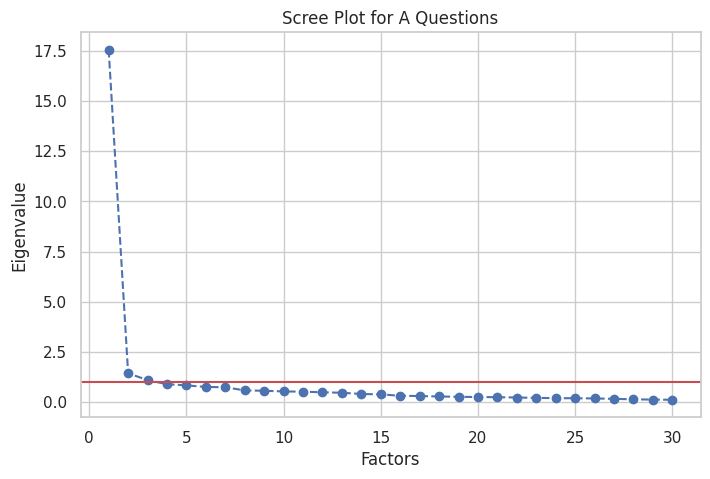

Optimal number of factors for A Questions: 3


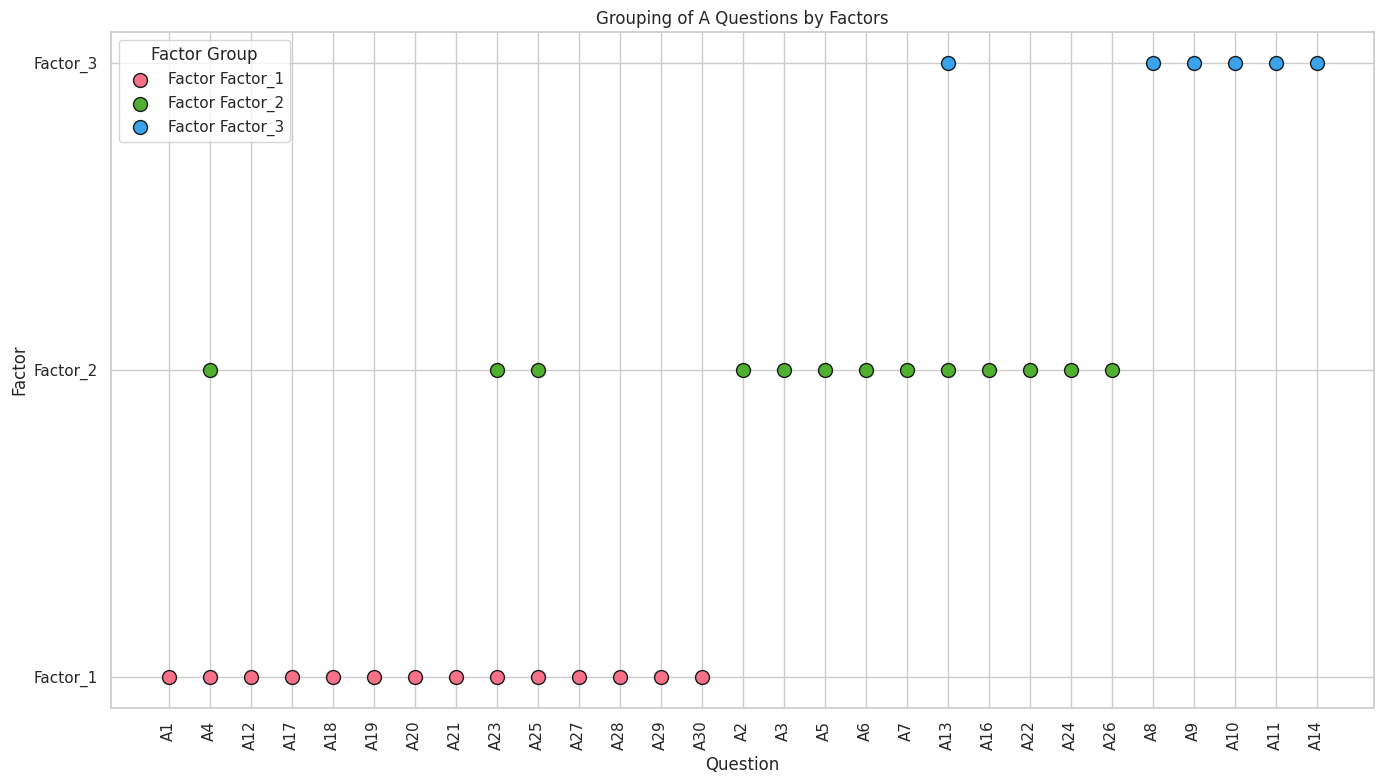

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import bartlett

# Load the data from CSV file
file_name = 'Phase 1 Data.csv'
data = pd.read_csv(file_name)

# Select only A questions
a_questions_columns = [col for col in data.columns if col.startswith('A')]
a_questions_data = data[a_questions_columns]

# Handle missing values
a_questions_data.fillna(a_questions_data.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
a_questions_data_scaled = scaler.fit_transform(a_questions_data)

# Regularization for factor analysis
def regularize(data):
    epsilon = 1e-8
    return data + epsilon

a_questions_data_scaled_reg = regularize(a_questions_data_scaled)

# Perform KMO and Bartlett’s Test
try:
    kmo_all, kmo_model = calculate_kmo(a_questions_data_scaled_reg)
    print(f"KMO Test Score for A Questions: {kmo_model:.3f}")
except Exception as e:
    print(f"Error in KMO calculation for A Questions: {e}")

try:
    chi_square_value, p_value = bartlett(*[a_questions_data[col] for col in a_questions_columns])
    print(f"Bartlett’s Test p-value for A Questions: {p_value:.3f}")
except Exception as e:
    print(f"Error in Bartlett’s Test calculation for A Questions: {e}")

# Perform Factor Analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(a_questions_data_scaled_reg)

# Get eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot for A Questions')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

# Optimal number of factors
optimal_factors = sum(eigenvalues > 1)
print(f'Optimal number of factors for A Questions: {optimal_factors}')

# Fit Factor Analysis with optimal number of factors
fa_optimal = FactorAnalyzer(n_factors=optimal_factors, rotation='promax')
fa_optimal.fit(a_questions_data_scaled_reg)

# Get Factor Loadings
factor_loadings = pd.DataFrame(fa_optimal.loadings_, index=a_questions_columns)

# Save the factor loadings to CSV
factor_loadings.to_csv('factor_loadings_A.csv')

# Automatically assign questions to factors
grouped_questions = {}
for i in range(optimal_factors):
    factor_questions = factor_loadings.index[factor_loadings[i] > 0.4].tolist()  # Adjust threshold if needed
    grouped_questions[f'Factor_{i + 1}'] = factor_questions

# Convert results to DataFrame
group_results = []
for group_name, questions in grouped_questions.items():
    for question in questions:
        group_results.append({'Question': question, 'Group': group_name})

group_results_df = pd.DataFrame(group_results)

# Save the grouped questions to CSV
group_results_df.to_csv('grouped_questions_A.csv', index=False)

# Plot the factor loadings
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a color palette for the factors
palette = sns.color_palette("husl", len(group_results_df['Group'].unique()))

# Plot each factor with a different color
for factor, color in zip(group_results_df['Group'].unique(), palette):
    subset = group_results_df[group_results_df['Group'] == factor]
    plt.scatter(subset['Question'], [factor] * len(subset), label=f'Factor {factor}', s=100, edgecolor='k', color=color)

plt.xticks(rotation=90)
plt.xlabel('Question')
plt.ylabel('Factor')
plt.title('Grouping of A Questions by Factors')
plt.legend(title='Factor Group')
plt.tight_layout()

# Save the plot
plt.savefig('grouped_questions_plot_A.png')
plt.show()
